# 서울랜드 방문객 수 분석

In [1]:
import os
print(os.getcwd())

C:\Users\ehman\Seoul_Land_Admission


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

!pip install xlrd

import xlrd

!pip install openpyxl

import openpyxl

import datetime

import warnings
warnings.simplefilter("ignore")

plt.rc('font',family='D2Coding')

You should consider upgrading via the 'c:\users\ehman\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\ehman\anaconda3\python.exe -m pip install --upgrade pip' command.


In [36]:
seoulland_admission_18_22=pd.read_csv('Data/seoulland_admission_18_22.csv')

In [37]:
seoulland_admission_18_22

,날짜,요일,날씨,유료소계,어른,청소년,어린이,외국인,단체입장,무료소계,총계
0,2018-01-01,월,맑음,1683.0,1375.0,99.0,209.0,40.0,0.0,619.0,2302.0
1,2018-01-02,화,구름 조금,401.0,342.0,15.0,44.0,22.0,119.0,578.0,979.0
2,2018-01-03,수,구름 조금,191.0,153.0,22.0,16.0,4.0,0.0,502.0,693.0
3,2018-01-04,목,흐림,163.0,132.0,9.0,22.0,14.0,1.0,488.0,651.0
4,2018-01-05,금,구름 조금,188.0,145.0,12.0,31.0,8.0,0.0,567.0,755.0
...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,목,NaN,2263.0,1579.0,387.0,297.0,4.0,700.0,1161.0,3424.0
1761,2022-10-28,금,NaN,3334.0,2038.0,928.0,368.0,2.0,866.0,980.0,4314.0
1762,2022-10-29,토,NaN,12404.0,10377.0,252.0,1775.0,59.0,459.0,1993.0,14397.0
1763,2022-10-30,일,NaN,25551.0,20898.0,522.0,4131.0,0.0,12475.0,1331.0,26882.0


In [38]:
seoulland_admission_18_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1765 non-null   object 
 1   요일      1765 non-null   object 
 2   날씨      806 non-null    object 
 3   유료소계    1736 non-null   float64
 4   어른      1764 non-null   float64
 5   청소년     1764 non-null   float64
 6   어린이     1764 non-null   float64
 7   외국인     1763 non-null   float64
 8   단체입장    1759 non-null   float64
 9   무료소계    1764 non-null   float64
 10  총계      1736 non-null   float64
dtypes: float64(8), object(3)
memory usage: 151.8+ KB


날씨가 중요할거 같은데, 많이 비어있습니다.

In [39]:
seoulland_admission_18_22.isna().sum()

날짜        0
요일        0
날씨      959
유료소계     29
어른        1
청소년       1
어린이       1
외국인       2
단체입장      6
무료소계      1
총계       29
dtype: int64

In [40]:
seoulland_admission_18_22['날씨'].fillna('미관측',inplace=True)

In [41]:
seoulland_admission_18_22['날씨'].value_counts()

미관측      959
맑음       276
구름 많음    208
구름 조금    114
비         95
흐림        93
소나기       12
눈          5
눈/비        2
비/눈        1
Name: 날씨, dtype: int64

미관측 데이터가 어디에 모여있는지 그래프를 그려보겠습니다.

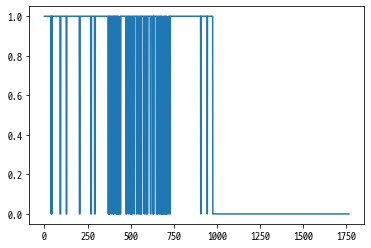

In [42]:
seoulland_admission_18_22['날씨'].apply(lambda x:0 if x=='미관측' else 1).plot()

중간중간 비긴 하는데, 대략 1000언저리에서 아예 없습니다.

In [43]:
seoulland_admission_18_22[950:1000]

,날짜,요일,날씨,유료소계,어른,청소년,어린이,외국인,단체입장,무료소계,총계
950,2020-08-08,토,비,1685.0,1426.0,35.0,224.0,1.0,0.0,982.0,2667.0
951,2020-08-09,일,비,54.0,46.0,4.0,4.0,0.0,0.0,177.0,231.0
952,2020-08-10,월,비,407.0,310.0,13.0,84.0,1.0,30.0,324.0,731.0
953,2020-08-11,화,비,316.0,242.0,5.0,69.0,1.0,0.0,316.0,632.0
954,2020-08-12,수,흐림,1152.0,916.0,20.0,216.0,7.0,30.0,713.0,1865.0
955,2020-08-13,목,흐림,806.0,661.0,17.0,128.0,4.0,0.0,577.0,1383.0
956,2020-08-14,금,비,489.0,402.0,18.0,69.0,2.0,0.0,380.0,869.0
957,2020-08-15,토,비,643.0,543.0,16.0,84.0,7.0,0.0,427.0,1070.0
958,2020-08-16,일,흐림,5257.0,3614.0,773.0,870.0,35.0,0.0,1012.0,6269.0
959,2020-08-17,월,구름 많음,2506.0,2203.0,67.0,236.0,7.0,0.0,1018.0,3524.0


위치를 찾아보니, 2020년 9월 3일부터 없습니다.

In [44]:
seoulland_admission_18_22.loc[976:,'날씨'].value_counts()

미관측    789
Name: 날씨, dtype: int64

그전에도 종종 없지만.. 이후에는 날씨가 전혀 기록되지 않았네요.

아무래도 날씨가 방문자 수에 큰 영향을 줄 것이라고 예상되기 때문에 절반 이상이 없는 것은 아쉽습니다.

날씨는 기상자료개방포털을 확인하면 수집이 가능한데요.

https://data.kma.go.kr/cmmn/main.do

방재기상관측(AWS) - 자료를 받았습니다. 관측 위치도 과천과학관이라 서울대공원 바로 옆입니다.

https://data.kma.go.kr/data/grnd/selectAwsRltmList.do?pgmNo=56

평균기온과 일강수량 정보를 다운로드 받았습니다.

In [45]:
weather_2018=pd.read_csv('Data/날씨/OBS_AWS_DD_20221224212006.csv',encoding='cp949')
weather_2019=pd.read_csv('Data/날씨/OBS_AWS_DD_20221224212053.csv',encoding='cp949')
weather_2020=pd.read_csv('Data/날씨/OBS_AWS_DD_20221224212115.csv',encoding='cp949')
weather_2021=pd.read_csv('Data/날씨/OBS_AWS_DD_20221224212144.csv',encoding='cp949')
weather_2022=pd.read_csv('Data/날씨/OBS_AWS_DD_20221224212216.csv',encoding='cp949')

weather=pd.concat([weather_2018,weather_2019,weather_2020,weather_2021,weather_2022])

weather.reset_index(drop=True,inplace=True)

seoulland_admission_18_22=pd.concat([seoulland_admission_18_22,weather.iloc[:,3:]],axis=1)


In [49]:
seoulland_admission_18_22.isna().sum()

날짜           0
요일           0
날씨           0
유료소계        29
어른           1
청소년          1
어린이          1
외국인          2
단체입장         6
무료소계         1
총계          29
평균기온(°C)    11
일강수량(mm)     0
dtype: int64

결측치가 여전히 존재하지만, 미미한 수준이라 전처리하면서 정리하겠습니다.